In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.datasets import make_low_rank_matrix
from sklearn.datasets import make_blobs # sample data for clustering
from sklearn.datasets import make_circles
from sklearn.decomposition import PCA

In [27]:
# To generate sample data for Regression
X, y = make_regression(n_samples=100, n_features=10)

In [28]:
print(X.shape)
print(y.shape)

(100, 10)
(100,)


In [29]:
df_features = pd.DataFrame(X, columns= ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10'])
df_target = pd.DataFrame(y, columns=['target'])

In [30]:
reg_df = pd.concat([df_features, df_target], axis=1)

In [31]:
reg_df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,target
0,-0.083557,-0.261943,-0.273896,0.171326,1.381876,2.066951,0.554579,1.846278,-1.606366,-1.700326,223.054852
1,-1.616909,1.025397,-0.120289,0.588667,0.544139,0.354889,1.159457,1.000834,-0.705427,-0.901051,73.737952
2,0.278119,0.709629,-1.757425,1.168567,0.932287,2.147391,1.600004,-0.862834,-0.630666,-0.483502,344.400714
3,-0.613493,0.767948,1.053126,-0.718327,-1.527247,1.258713,-0.726546,-0.788936,-0.970227,0.038906,-187.514101
4,0.531860,0.546132,0.705283,0.868958,-0.793132,0.566606,0.328356,1.242141,-1.832649,0.463752,177.104894


In [32]:
# To generate sample data for classification

In [33]:
X, y = make_classification(n_samples=100, n_classes=2, n_features=10)

In [34]:
print(X.shape)
print(y.shape)

(100, 10)
(100,)


In [35]:
df_features = pd.DataFrame(X, columns= ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10'])
df_target = pd.DataFrame(y, columns=['Target'])

In [36]:
cl_df = pd.concat([df_features, df_target], axis=1)

In [37]:
cl_df.sample(10)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Target
50,-0.167336,0.011375,0.420886,0.376501,0.878240,0.649527,1.949319,0.800844,1.254972,-0.305342,1
5,-0.164804,0.538805,2.064967,-0.162808,0.456506,-0.894761,-1.355462,1.289860,0.981183,-0.233141,0
30,-0.078427,1.536214,-1.162922,-0.651230,1.266885,-2.075687,1.622572,-0.697664,0.192960,-1.460417,0
4,0.118333,-0.345930,1.077791,-0.452188,1.460389,-0.994019,-0.820506,-1.433327,-0.976248,2.540805,0
28,-0.018691,1.233993,0.015106,-0.824147,-0.218606,-2.418304,-0.442103,1.209935,-0.273430,-0.242663,0
43,-0.125350,0.578307,-0.064471,0.562503,0.200254,1.293075,0.538185,0.224218,1.074012,-0.717174,1
78,0.083281,-1.152641,-0.142790,0.094975,0.084946,0.488682,0.440360,0.501533,-0.489763,-0.373173,1
62,0.400221,-1.395019,0.477380,0.485220,-0.632689,2.431258,-0.705829,-0.747214,-2.339874,-1.037577,1
48,-0.078780,0.197166,-1.139140,-0.583963,0.403094,-1.883170,-0.905223,2.635961,0.227353,0.888777,0
14,0.355221,-1.227664,-0.479129,0.448731,1.289777,2.209849,-0.813935,-0.806312,-2.068158,0.520894,1


In [38]:
# To generate sample data for dimentiality reduction

In [39]:
def variance_plot(n_samples=100, n_features=10, effective_rank=2, tail_strength=0.5):

    X = make_low_rank_matrix(n_samples=n_samples,
                             n_features=n_features,
                             effective_rank=effective_rank,
                             tail_strength=tail_strength)

    pca = PCA(n_components=n_features)
    X_reduced = pca.fit_transform(X)

    cum_variance= np.cumsum(pca.explained_variance_ratio_)
    print('comulative variance {}'.format(cum_variance))

    plt.figure(figsize=(12,10))
    plt.plot(cum_variance)
    plt.xlabel('n_components')
    plt.ylabel('cumulative variance')

    return { 'matrix': X, 'pca_model': PCA}

comulative variance [0.53180426 0.87002208 0.96428285 0.9814523  0.98660123 0.98987551
 0.99281312 0.99543249 0.99783018 1.        ]


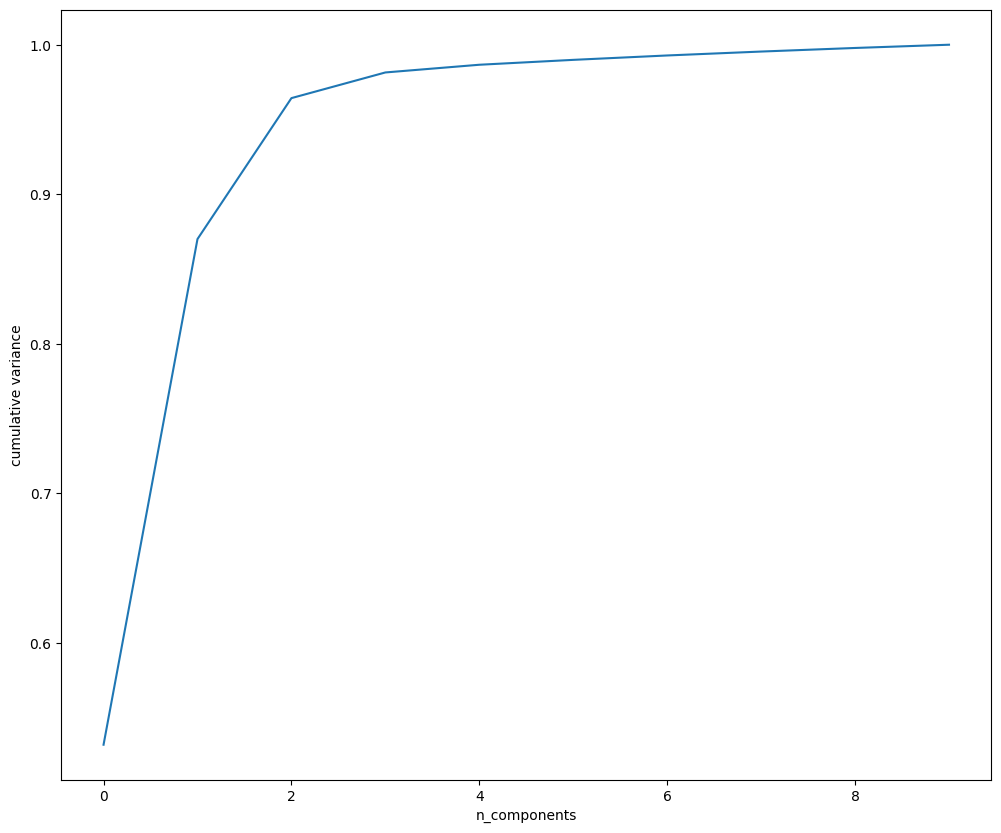

In [40]:
plot = variance_plot(tail_strength=0.1)
plt.show()

comulative variance [0.47833355 0.79931401 0.90500647 0.9367896  0.95223179 0.96351008
 0.97384229 0.98347928 0.99219602 1.        ]


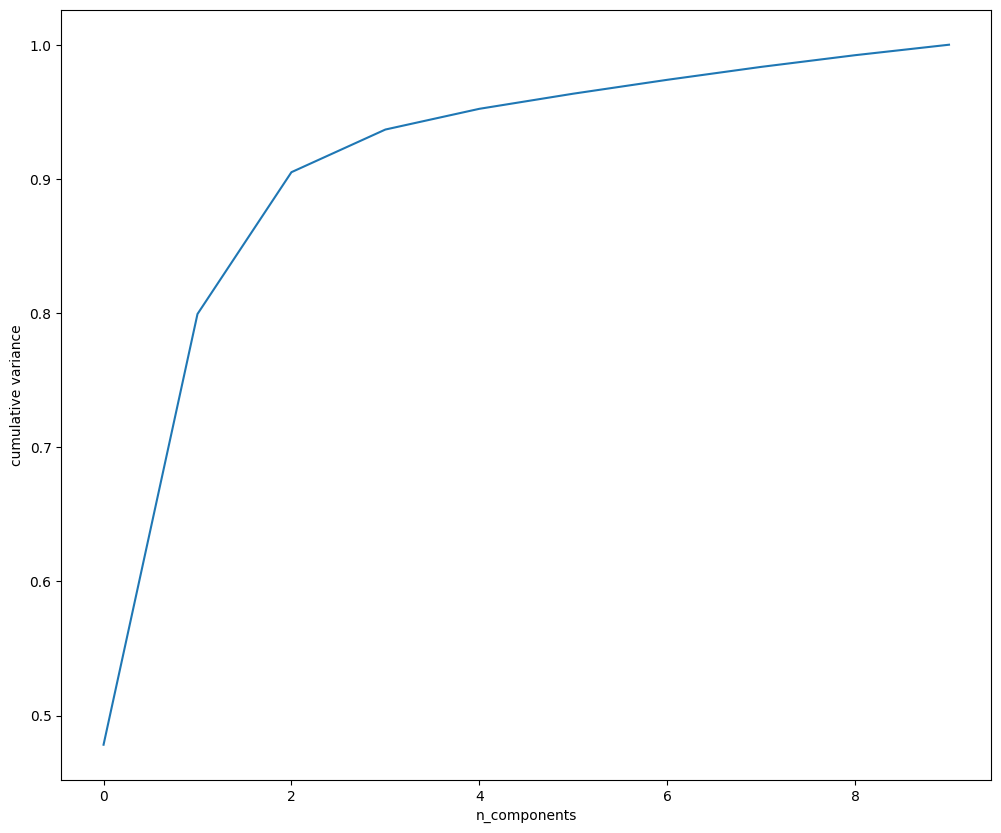

In [41]:
plot_1 = variance_plot(tail_strength=0.2)
plt.show()

comulative variance [0.42457091 0.70588608 0.82618508 0.87393588 0.90285513 0.92660973
 0.94801863 0.96736232 0.98487696 1.        ]


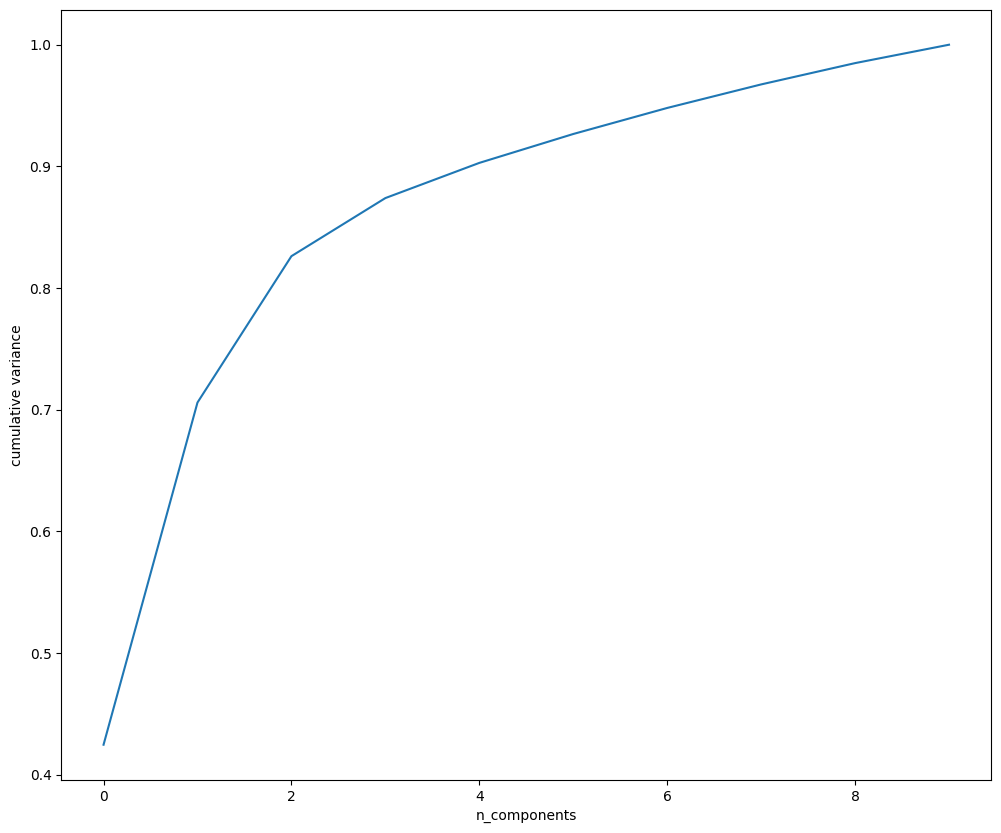

In [42]:
plot_3 = variance_plot(tail_strength=0.3)
plt.show()

In [43]:
# to generate sample data for fitting clustering model

In [44]:
X, y = make_blobs(n_samples=100, n_features=2, centers=5)

In [45]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


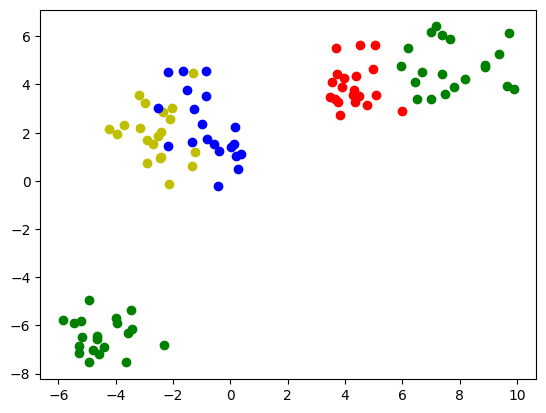

In [46]:
for i in range(len(X)):
    colors = ['r', 'g', 'b', 'y', 'g', 'w']
    plt.scatter(X[i][0], X[i][1], c=colors[y[i]])
plt.show()

In [47]:
X , color = make_circles(n_samples=200, noise=0.05, factor=0.5)

In [48]:
print(X.shape)
print(color.shape)

(200, 2)
(200,)


In [49]:
color

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0])

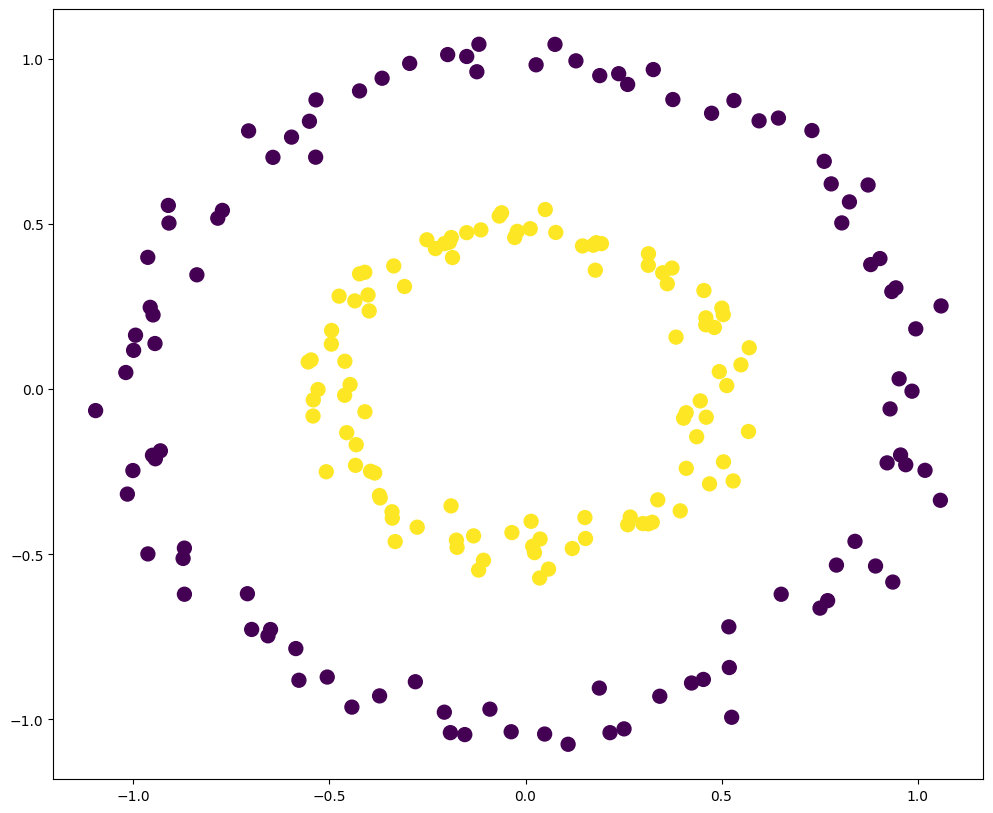

In [50]:
plt.figure(figsize=(12,10))
plt.scatter(X[:,0], X[:,1], c=color, s=100)
plt.show()